In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [2]:
model_path = "../models/xception_v1_46_0.874.keras"

In [3]:
model = keras.models.load_model(model_path)

In [5]:
img = load_img(
    "../week8/test/pants/1b5f2882-e33e-4efc-b469-bcf87b9f53ed.jpg",
    target_size=(299, 299)
)

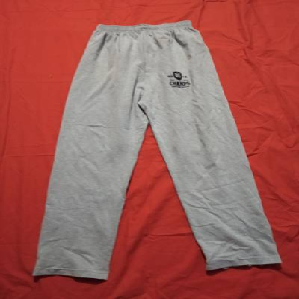

In [6]:
img

In [7]:
X = np.array([img])

X = preprocess_input(X)

In [8]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [9]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants' ,
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt']

In [10]:
dict(zip(classes, pred[0]))

{'dress': -3.871988,
 'hat': -11.391575,
 'longsleeve': -1.8282346,
 'outwear': -4.1449394,
 'pants': 3.1879904,
 'shirt': -1.9752043,
 'shoes': -12.967206,
 'shorts': -0.23962191,
 'skirt': -3.950756,
 't-shirt': -7.362416}

### Convert model to Tensorflow Lite

In [11]:
import tensorflow.lite as tflite

In [12]:
converter = tflite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('../models/clothing-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\B-CICH~1\AppData\Local\Temp\tmp2mnt0a2p\assets


INFO:tensorflow:Assets written to: C:\Users\B-CICH~1\AppData\Local\Temp\tmp2mnt0a2p\assets


Saved artifact at 'C:\Users\B-CICH~1\AppData\Local\Temp\tmp2mnt0a2p'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2058157382672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2058157383824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2058157384016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2058157384208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2058157380560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2058157384400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2058157383248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2058157385168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2058157385552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2058157383632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

In [13]:
interpreter = tflite.Interpreter(model_path='../models/clothing-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [14]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [15]:
preds

array([[ -3.871986  , -11.391567  ,  -1.8282375 ,  -4.1449337 ,
          3.1879942 ,  -1.9752036 , -12.967211  ,  -0.23961997,
         -3.9507537 ,  -7.3624153 ]], dtype=float32)

### Removing Tensorflow dependencies

In [16]:
from PIL import Image

In [17]:
img_path = "../week8/test/pants/1b5f2882-e33e-4efc-b469-bcf87b9f53ed.jpg"

In [18]:
with Image.open(img_path) as img:
    img = img.resize((299, 299), Image.NEAREST)

In [19]:
# Get the code for preprocessing images from keras github repo
def preprocess_input(x):
    x /= 127.5
    x -= 1.
    return x

In [20]:
X = np.array([img], dtype='float32')

X = preprocess_input(X)

In [21]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [22]:
dict(zip(classes, preds[0]))

{'dress': -3.871986,
 'hat': -11.391567,
 'longsleeve': -1.8282375,
 'outwear': -4.1449337,
 'pants': 3.1879942,
 'shirt': -1.9752036,
 'shoes': -12.967211,
 'shorts': -0.23961997,
 'skirt': -3.9507537,
 't-shirt': -7.3624153}

### Alternative way of doing this

In [ ]:
!pip install keras-image-helper

In [1]:
pip install ai-edge-litert

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ai-edge-litert (from versions: none)
ERROR: No matching distribution found for ai-edge-litert


In [53]:
from ai_edge_litert.interpreter import Interpreter
from keras_image_helper import create_preprocessor

In [54]:
interpreter = Interpreter(model_path='../models/clothing-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [41]:
preprocessor = create_preprocessor('xception', target_size=(299, 299))

In [46]:
img_path = "../week8/test/pants/1b5f2882-e33e-4efc-b469-bcf87b9f53ed.jpg"

In [47]:
X = preprocessor.from_path(img_path)

In [48]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [49]:
dict(zip(classes, preds[0]))

{'dress': -3.871986,
 'hat': -11.391567,
 'longsleeve': -1.8282375,
 'outwear': -4.1449337,
 'pants': 3.1879942,
 'shirt': -1.9752036,
 'shoes': -12.967211,
 'shorts': -0.23961997,
 'skirt': -3.9507537,
 't-shirt': -7.3624153}